# **Milestone 1, Phase 2**

`Julio Muhammad Rizki, FTDS Batch 003-HCK`

# Objectives

Sebuah perusahaan ingin meminimalisir resiko seorang customer untuk berhenti memakai produk yang mereka tawarkan. Notebook ini dibuat untuk membantu perusahaan tersebut untuk memprediksi customer yang akan berhenti (churn) dari dataset yang ada. Prediksi akan dilakukan menggunakan Model dari Tensorflow, Keras.

# Library Import

Berikut adalah library yang akan digunakan dalam pengerjaan notebook.

In [48]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings(action='ignore')

import phik
from phik import resources, report
from phik.report import plot_correlation_matrix

import joblib

# Data Loading

Berikut adalah data yang akan digunakan.

In [2]:
df = pd.read_csv('churn.csv')

df.head(10).append(df.tail(10))

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,22:29:49,4,1184.490000,38604.69,10.0,627.480000,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,15:44:56,11,338.150000,7665.66,17.0,575.970000,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,20:31:53,8,235.140000,37671.69,5.0,767.930000,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,14:28:05,10,56.670000,15678.14,11.0,590.220000,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,04:16:48,9,153.990000,8422.68,0.0,722.040000,Yes,No,No,Not Applicable,Poor Product Quality,0
5,96fbb6f63244b1f4,35,M,Town,Premium Membership,2016-08-16,No,Credit/Debit Card Offers,NaN,Wi-Fi,14:50:53,20,1397.318999,29664.01,28.0,782.490000,No,Yes,Yes,Unsolved,Poor Product Quality,0
6,a52bc51378ecb057,43,M,NaN,Gold Membership,2017-03-09,Yes,Gift Vouchers/Coupons,Smartphone,Mobile_Data,15:14:20,11,416.300000,13160.39,24.0,712.940000,Yes,No,No,Not Applicable,No reason specified,1
7,94f338d20bf0f2b2,15,M,City,No Membership,2016-09-11,No,Credit/Debit Card Offers,Smartphone,Wi-Fi,04:32:35,8,34.070000,9151.14,29.0,655.430000,Yes,No,No,Not Applicable,No reason specified,1
8,85c7996b17862e57,49,M,Town,Platinum Membership,2017-04-24,Yes,Without Offers,NaN,Fiber_Optic,18:26:30,3,650.120000,81628.48,11.0,0.000000,Yes,Yes,No,Not Applicable,Products always in Stock,0
9,8a1625846d7a198b,35,F,Town,Basic Membership,2016-12-01,Yes,Credit/Debit Card Offers,Desktop,Mobile_Data,07:58:44,5,106.230000,28232.59,16.0,984.933920,No,Yes,No,Not Applicable,Too many ads,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37010 entries, 0 to 37009
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       37010 non-null  object 
 1   age                           37010 non-null  int64  
 2   gender                        36951 non-null  object 
 3   region_category               31579 non-null  object 
 4   membership_category           37010 non-null  object 
 5   joining_date                  37010 non-null  object 
 6   joined_through_referral       31568 non-null  object 
 7   preferred_offer_types         36722 non-null  object 
 8   medium_of_operation           31615 non-null  object 
 9   internet_option               37010 non-null  object 
 10  last_visit_time               37010 non-null  object 
 11  days_since_last_login         37010 non-null  int64  
 12  avg_time_spent                37010 non-null  float64
 13  a

In [4]:
df.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score
count,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000
mean,37.120697,-41.943502,279.201356,29272.430216,14.659540,623.590885,0.540881
std,15.866834,228.875324,330.017336,19445.963492,9.478756,270.218956,0.498333
min,10.000000,-999.000000,0.000000,800.460000,0.000000,0.000000,0.000000
25%,23.000000,8.000000,60.122500,14177.835000,7.000000,574.220000,0.000000
50%,37.000000,12.000000,161.770000,27554.485000,14.000000,680.400000,1.000000
75%,51.000000,16.000000,356.525000,40858.672500,22.000000,756.990000,1.000000
max,64.000000,26.000000,3235.578521,99914.050000,73.061995,2069.069761,1.000000


Beberapa kolum dibawah ini akan dibuang karena diperkirakan tidak ada keterkaitan terhadap target yang akan diprediksi.

In [6]:
df.drop(['user_id', 'joining_date', 'last_visit_time'], axis=1, inplace=True)

# Exploratory Data Analysis

Sebelumnya akan dicari terlebih dahulu, kolum mana saja yang memiliki korelasi cukup baik terhadap kolum target (churn_risk_score).

interval columns not set, guessing: ['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet', 'churn_risk_score']


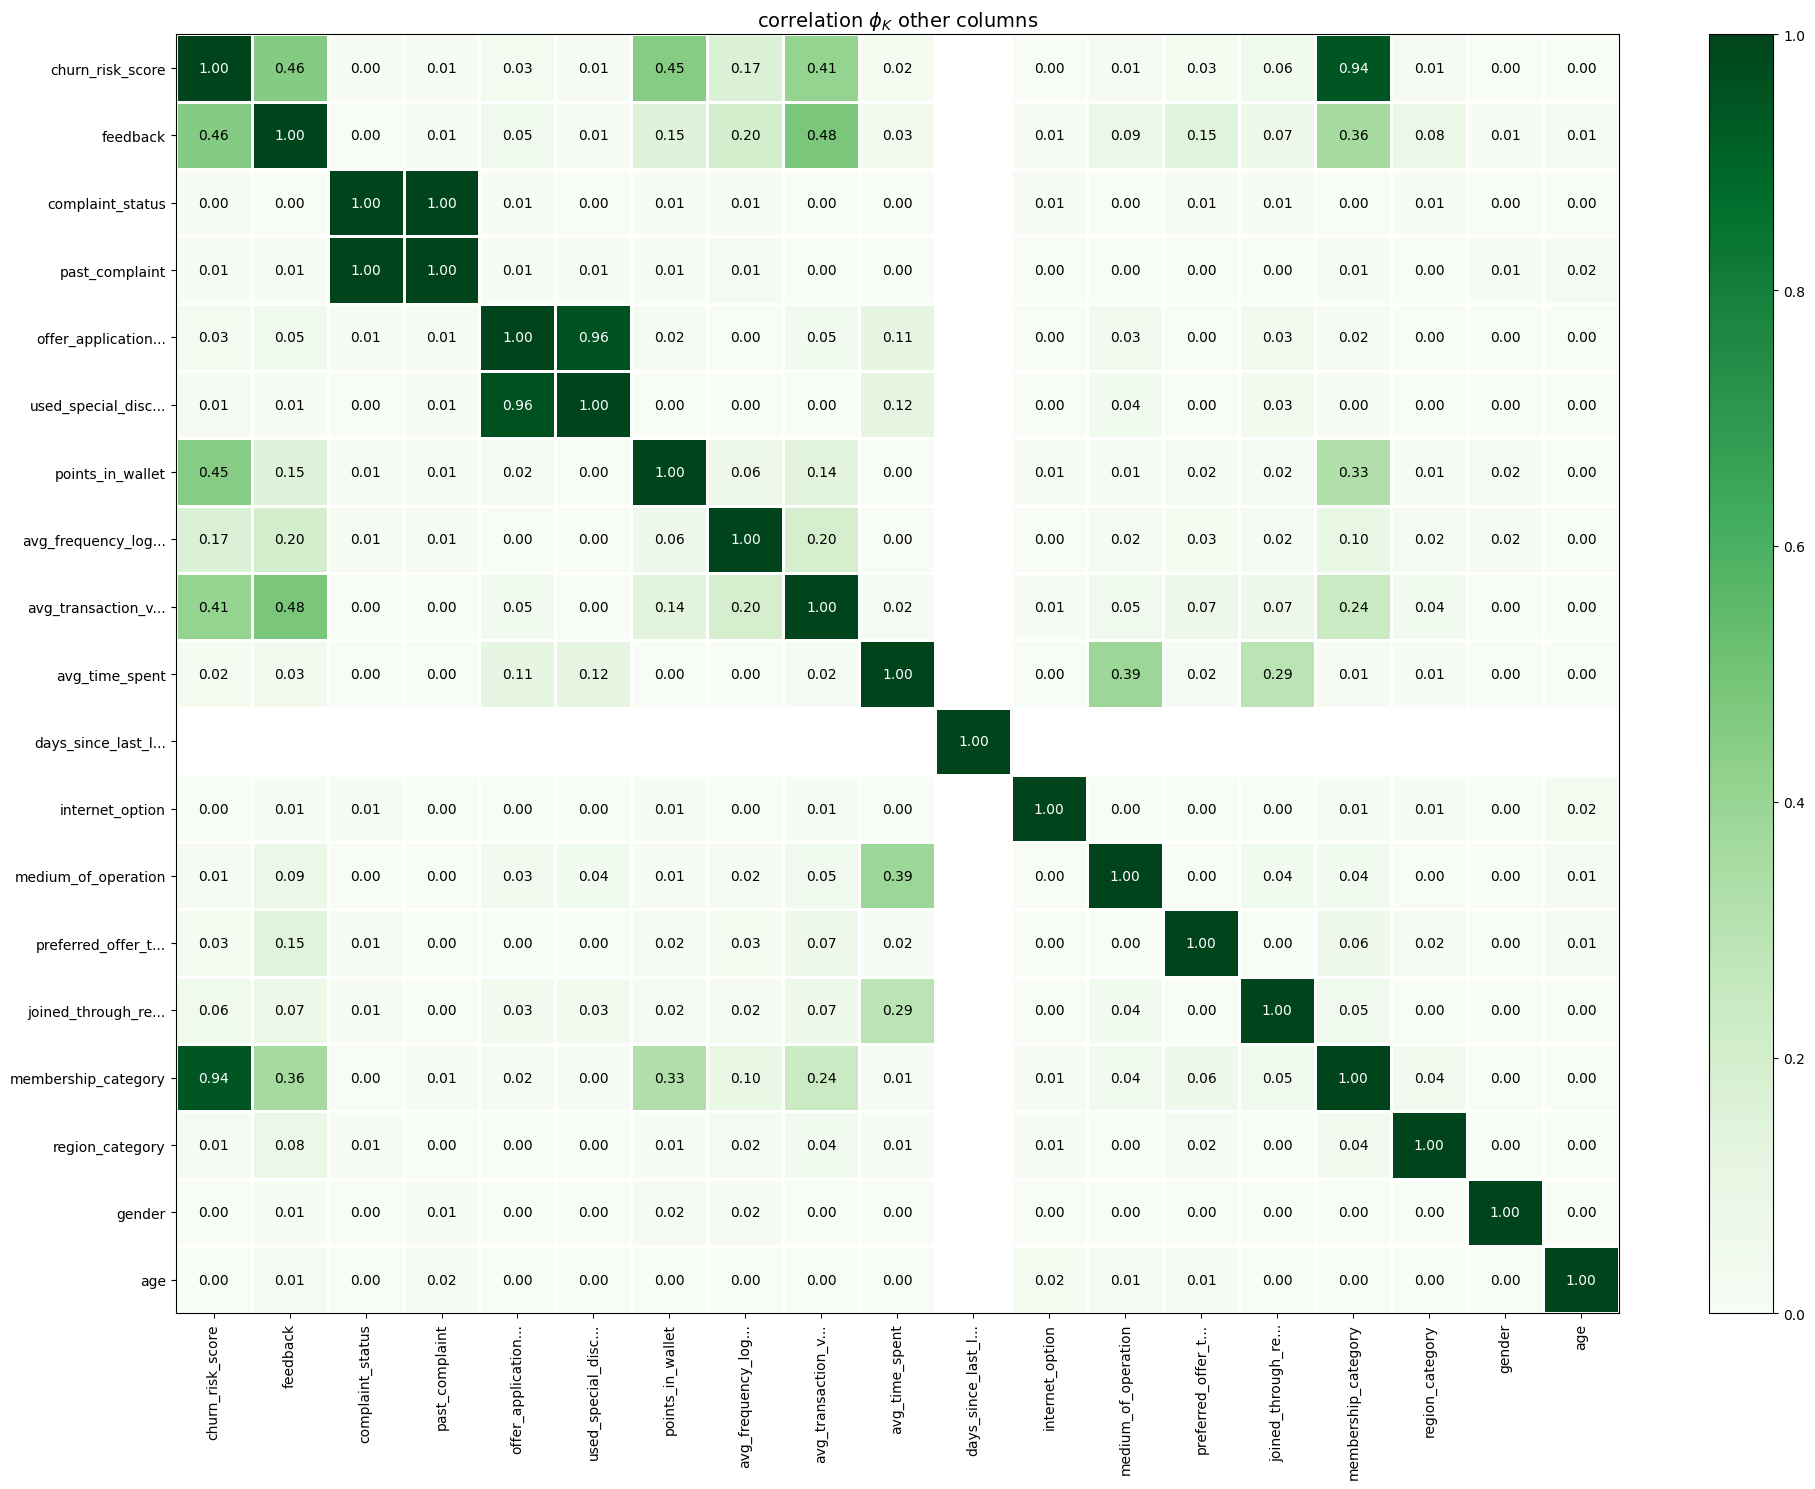

In [7]:
phik_overview = df.phik_matrix()
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$ other columns", 
                        fontsize_factor=1, 
                        figsize=(20,15))
plt.show()

In [8]:
phik_val = df.phik_matrix().churn_risk_score
phik_val.sort_values(ascending=False)

interval columns not set, guessing: ['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet', 'churn_risk_score']


churn_risk_score                1.000000
membership_category             0.942350
feedback                        0.455294
points_in_wallet                0.449584
avg_transaction_value           0.408676
avg_frequency_login_days        0.165015
joined_through_referral         0.055872
offer_application_preference    0.028299
preferred_offer_types           0.026098
avg_time_spent                  0.024580
used_special_discount           0.014272
region_category                 0.013303
medium_of_operation             0.013168
past_complaint                  0.011509
complaint_status                0.004630
internet_option                 0.001061
gender                          0.000000
age                             0.000000
days_since_last_login                NaN
Name: churn_risk_score, dtype: float64

Berdasarkan pencarian korelasi diatas, terdapat kejanggalan pada kolum days_since_last_login. Diduga karena adanya value -999 yang merupakan anomali. Dalam konteks tersebut nilai negatif seharusnya tidak ada, sehingga penulis memutuskan untuk mengganti valuenya dengan 0.

In [9]:
df['days_since_last_login'].replace({-999 : 0}, inplace=True)

In [10]:
phik_val = df.phik_matrix().churn_risk_score
phik_val.sort_values(ascending=False)

interval columns not set, guessing: ['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet', 'churn_risk_score']


churn_risk_score                1.000000
membership_category             0.942350
feedback                        0.455294
points_in_wallet                0.449584
avg_transaction_value           0.408676
avg_frequency_login_days        0.165015
joined_through_referral         0.055872
offer_application_preference    0.028299
preferred_offer_types           0.026098
avg_time_spent                  0.024580
days_since_last_login           0.015272
used_special_discount           0.014272
region_category                 0.013303
medium_of_operation             0.013168
past_complaint                  0.011509
complaint_status                0.004630
internet_option                 0.001061
gender                          0.000000
age                             0.000000
Name: churn_risk_score, dtype: float64

Berdasarkan korelasi antara kolum, peneliti memutuskan untuk membuang kolum-kolum dengan tingkat korelasi rendah. Semua kolum dari days_since_last_login kebawah akan dibuang.

In [11]:
df.drop(['gender', 'age', 'internet_option', 'complaint_status', 'days_since_last_login', 'used_special_discount', 'region_category', 'medium_of_operation', 'past_complaint'], axis=1, inplace=True)

Kemudian dilakukan pengecekan terhadap missing value.

<AxesSubplot: >

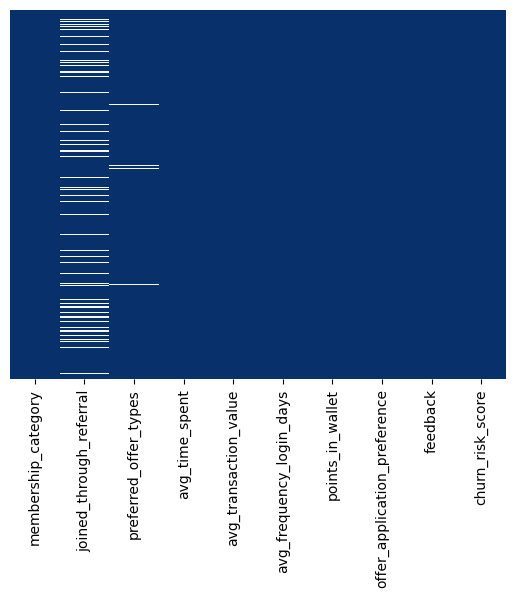

In [12]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='Blues_r')

Ditemukan terdapat missing value pada beberapa kolum. Karena jumlah entry data yang cukup banyak, maka peneliti memutuskan untuk membuang saja index yang terdapat missing value.

In [13]:
df.dropna(inplace=True)

<AxesSubplot: >

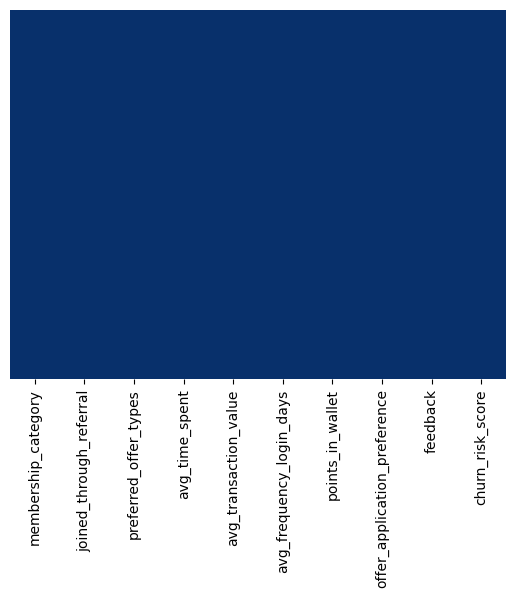

In [14]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='Blues_r')

Berikut adalah sebaran data pada kolum numerical. Dapat dilihat bahwa terdapat distribusi normal pada avg_frequency_login_days, namun pada ketiga kolum lainnya terdapat skewness. Skewness nantinya akan dihandle pada preprocessing dengan membuang/mengcaping outliers/anomaly data.

Skewness of avg_time_spent: 2.293180195995035
Skewness of avg_transaction_value: 1.0115414002879206
Skewness of avg_frequency_login_days: 0.37871199903632685
Skewness of points_in_wallet: -0.7800636233609756


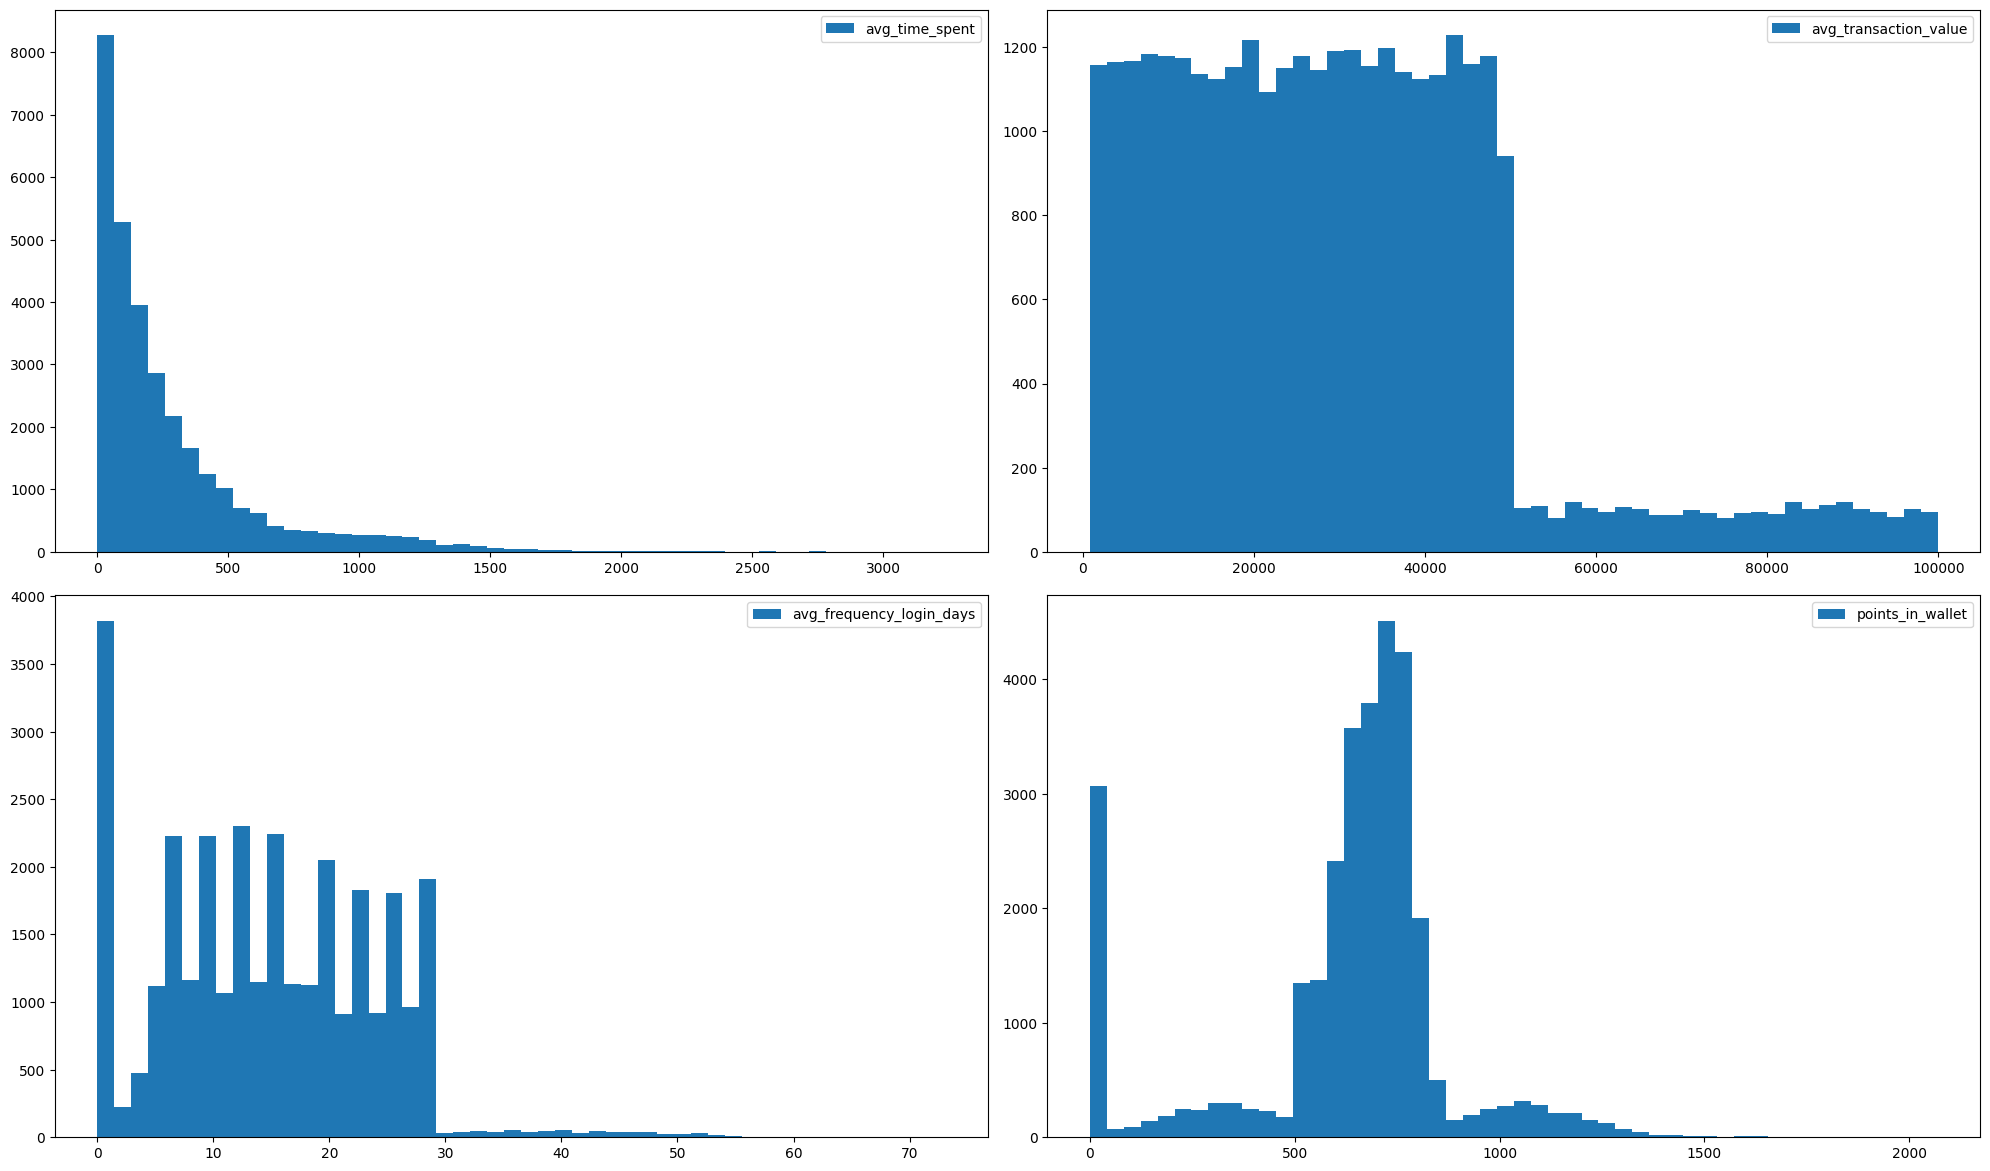

In [15]:
plt.figure(figsize=(20,35))
# Loop through each column in the DataFrame
for i, column in enumerate(df.columns):
    # Check if the column is numerical
    if df[column].dtype in [np.number]:
        plt.subplot(6,2, i + 2)
        plt.hist(df[column], bins=50, label=column)
        plt.legend()
        print(f"Skewness of {column}: {df[column].skew()}")

plt.tight_layout()
plt.show()

Berikut adalah sebaran data pada kolum kategorical. Pada data kategorical tidak terdapat adanya cardinality sehingga tidak ada yang perlu di handle disini.

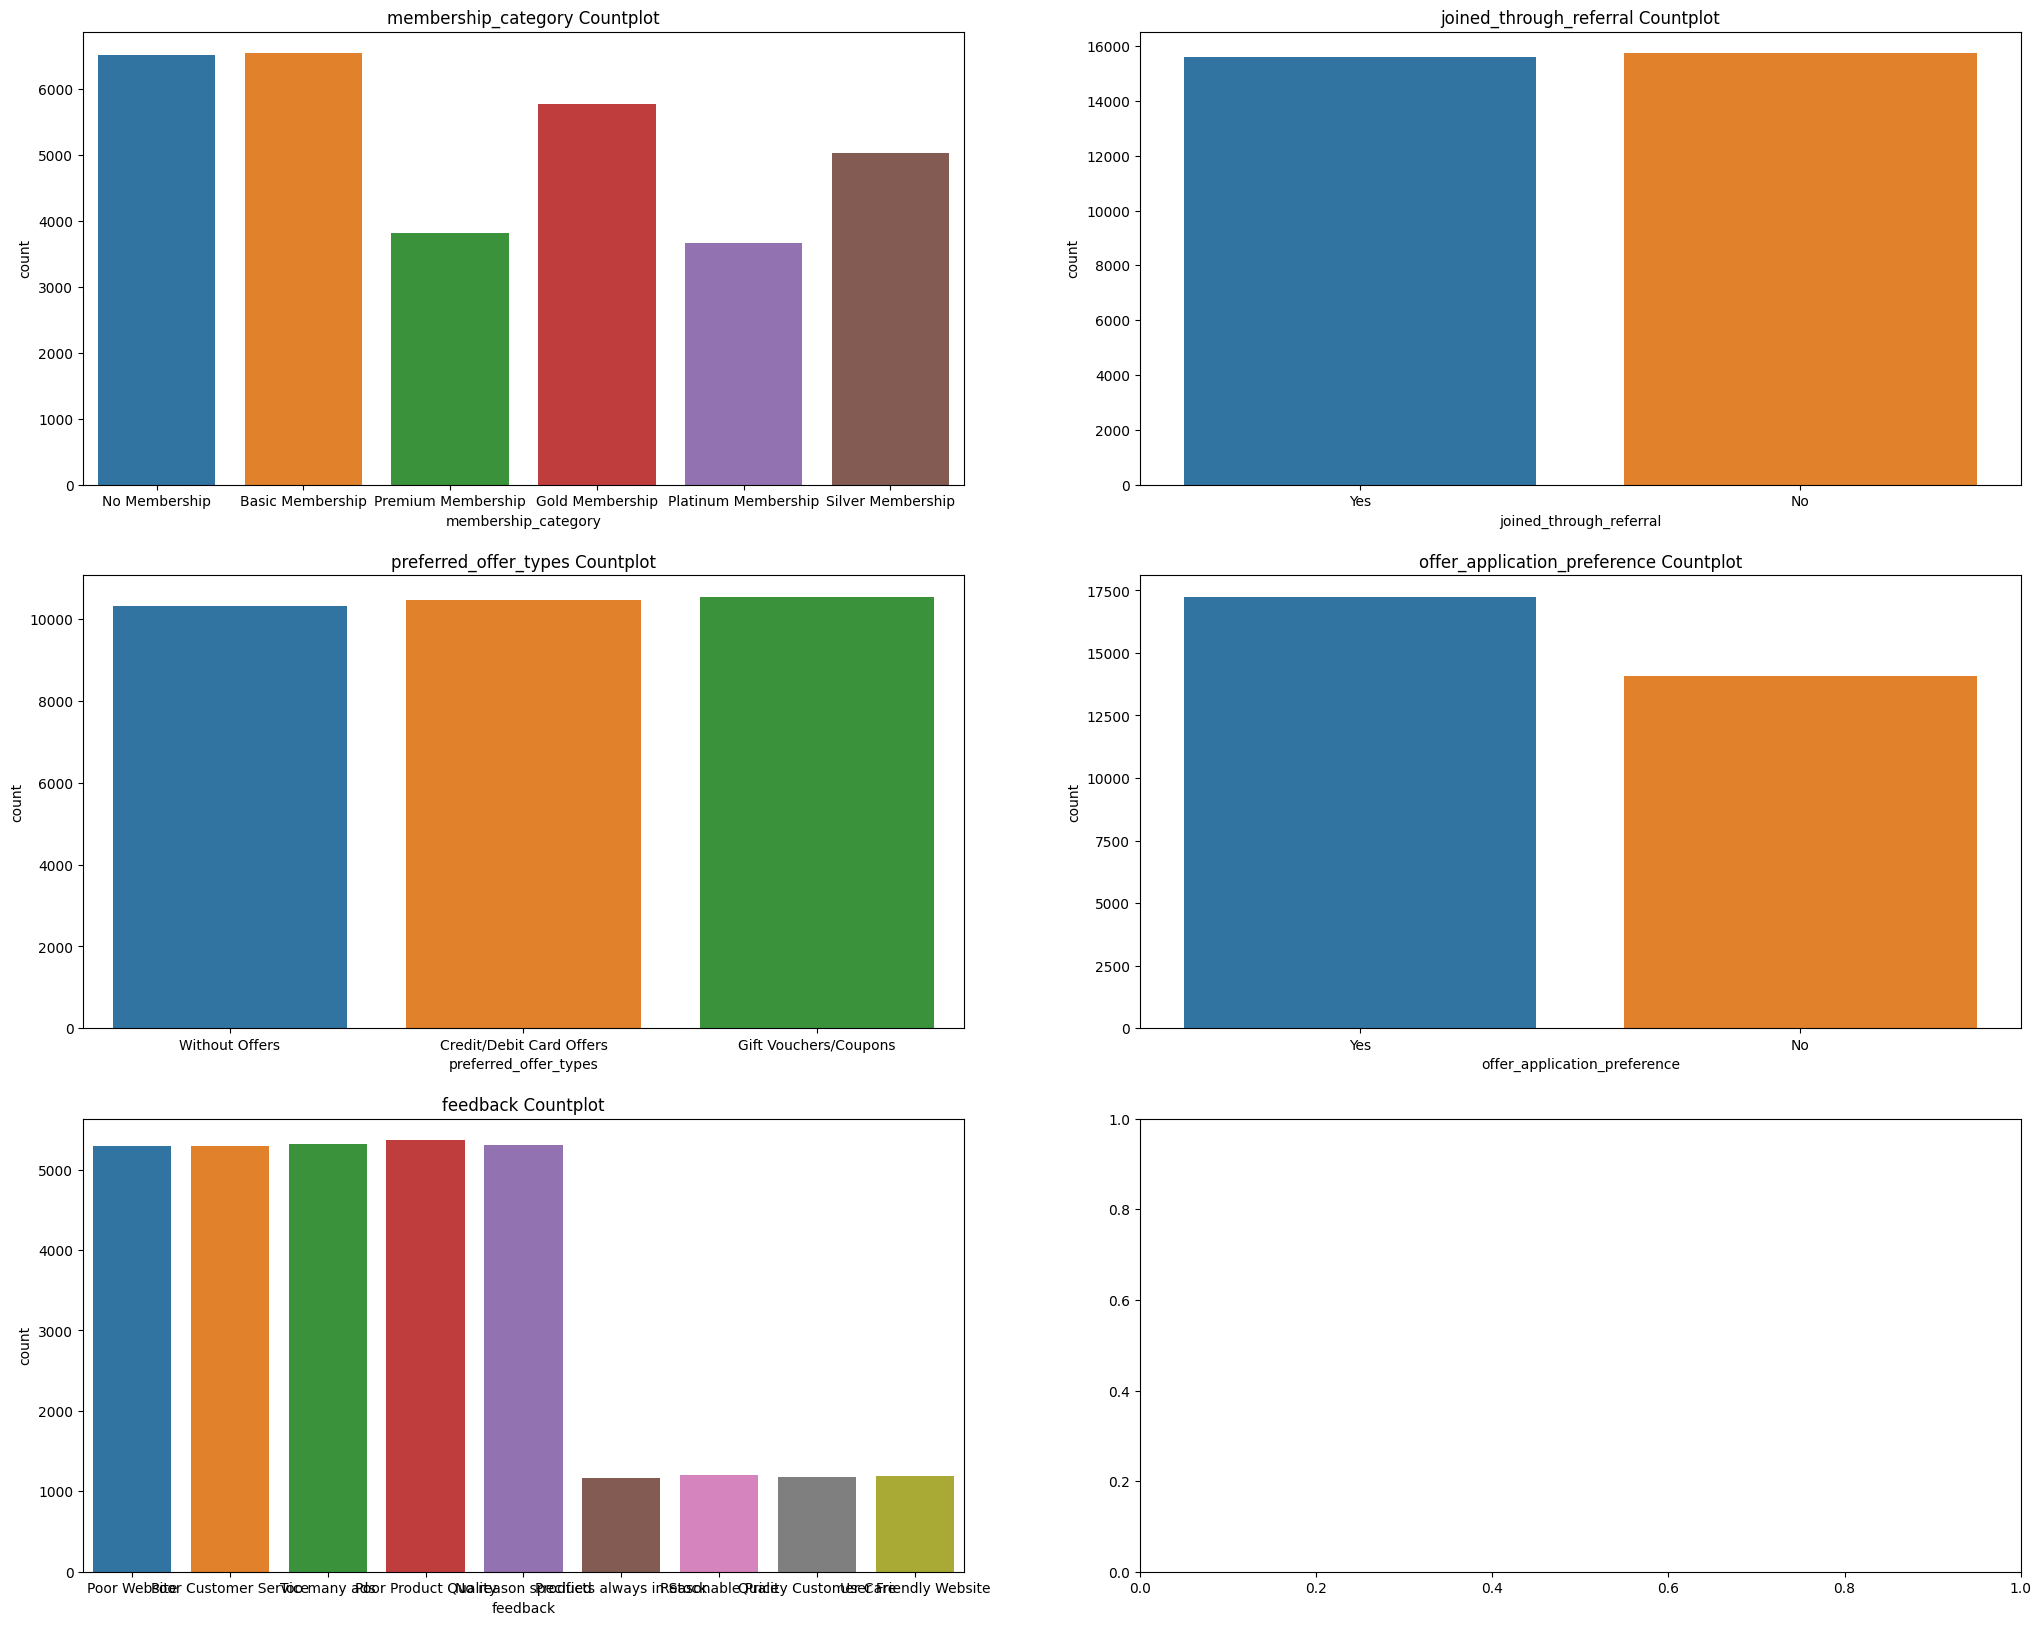

In [16]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=[25,20])

columns = ['membership_category', 'joined_through_referral', 'preferred_offer_types', 
            'offer_application_preference', 'feedback']

for i, column in enumerate(columns):
    sns.countplot(data=df, x=column, ax=ax[i//2, i%2])
    ax[i//2, i%2].set_title(f'{column} Countplot')

plt.show()

Berikut adalah sebaran data pada kolum target. Dapat dilihat bahwa sebaran kelas 0 dan kelas 1 cukup seimbang. Sehingga peneliti tidak melakukan oversampling/undersampling.

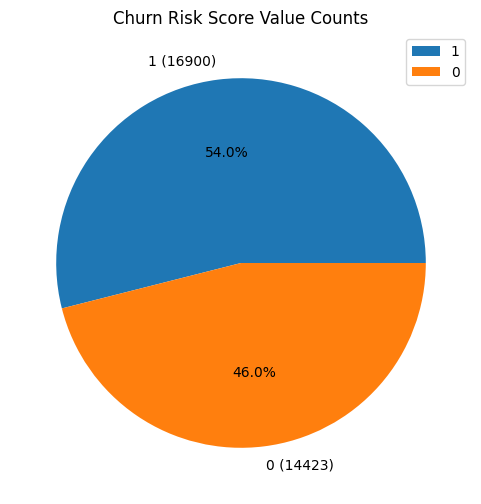

In [17]:
value_counts = df['churn_risk_score'].value_counts()
labels = [f'{i} ({j})' for i, j in zip(value_counts.index, value_counts.values)]

plt.figure(figsize=(6,6))
plt.pie(value_counts, labels=labels, autopct='%.1f%%')
plt.legend(value_counts.index)
plt.title('Churn Risk Score Value Counts')
plt.show()

# Feature Engineering

Berikutnya akan dilakukan feature engineering dan preprocessing untuk mempermudah jalannya machine learning.

Data dilakukan split menjadi data train, data test, dan data val.

In [18]:
data_train, data_test = train_test_split(df, train_size=0.8, random_state=14,stratify=df['churn_risk_score'])
data_train, data_val = train_test_split(data_train, train_size=0.8, random_state=14,stratify=data_train['churn_risk_score'])

Selanjutnya, untuk 3 kolum numerical yang sebelumnya memiliki distribusi data tidak normal akan dilakukan handling terhadap outlier.

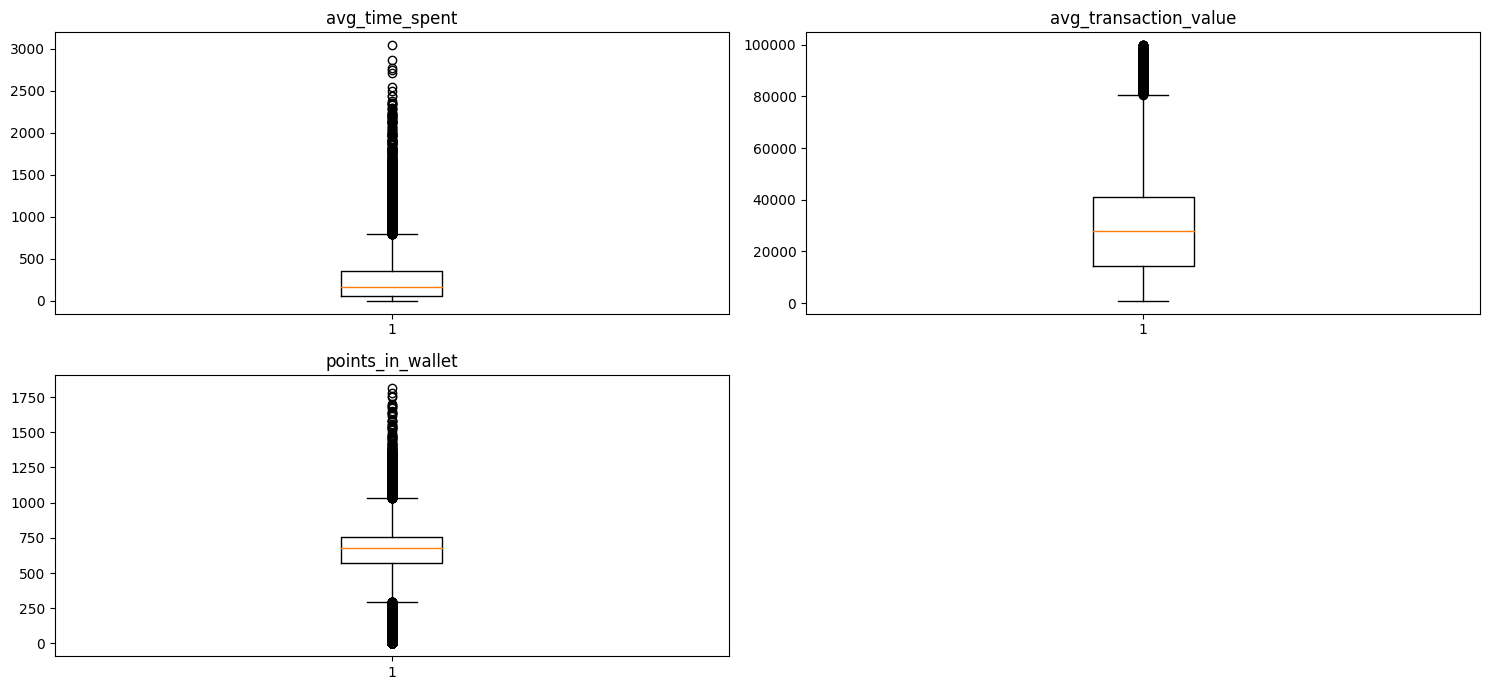

In [19]:
cols = ["avg_time_spent", "avg_transaction_value", "points_in_wallet"]

plt.figure(figsize=(15,7))

for i, column in enumerate(cols):
    plt.subplot(2,2, i + 1)
    plt.boxplot(data_train[column])
    plt.title(column)

plt.tight_layout()
plt.show()

In [53]:
def cek_outlier(cols):
  skew =data_train[cols].skew()
  if skew>=-0.5 and skew<=0.5:
    upper_boundary =data_train[cols].mean() + 3*data_train[cols].std()
    lower_boundary =data_train[cols].mean() - 3*data_train[cols].std()
  else:
    Q1 = np.quantile(data_train[cols], 0.25)
    Q3 = np.quantile(data_train[cols], 0.75)
    IQR =  Q3 - Q1
    upper_boundary = Q3 + 1.5 * IQR
    lower_boundary = Q1 - 1.5 * IQR

  outliers = data_train[(data_train[cols]<lower_boundary) | (data_train[cols]>upper_boundary)]
  data_clean = data_train[(data_train[cols]>=lower_boundary) & (data_train[cols]<=upper_boundary)]
  outliers_percent = len(outliers) / len(data_train) * 100

  return data_clean, outliers, outliers_percent

Ditemukan bahwa pada kolum avg_transaction_value, jumlah outlier tidak sampai 5% maka outlier akan dibuang. Sedangkan pada 2 kolum lainnya karena memiliki outlier yang cukup banyak, maka akan dilakukan capping.

In [21]:
for col in cols:
    df2, outliers, outliers_percent = cek_outlier(col)
    print(f"Percentage of outliers removed from {col}: {outliers_percent:.2f}%")


Percentage of outliers removed from avg_time_spent: 8.46%
Percentage of outliers removed from avg_transaction_value: 3.17%
Percentage of outliers removed from points_in_wallet: 18.01%


In [22]:
data_train, outliers, outliers_percent = cek_outlier('avg_transaction_value')
print(f"Percentage of outliers removed from avg_transaction_value: {outliers_percent:.2f}%")

Percentage of outliers removed from avg_transaction_value: 3.17%


In [23]:
wins = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=['points_in_wallet', 'avg_time_spent'])

data_train = wins.fit_transform(data_train)

Dilakukan pengecekan kembali terhadap outlier.

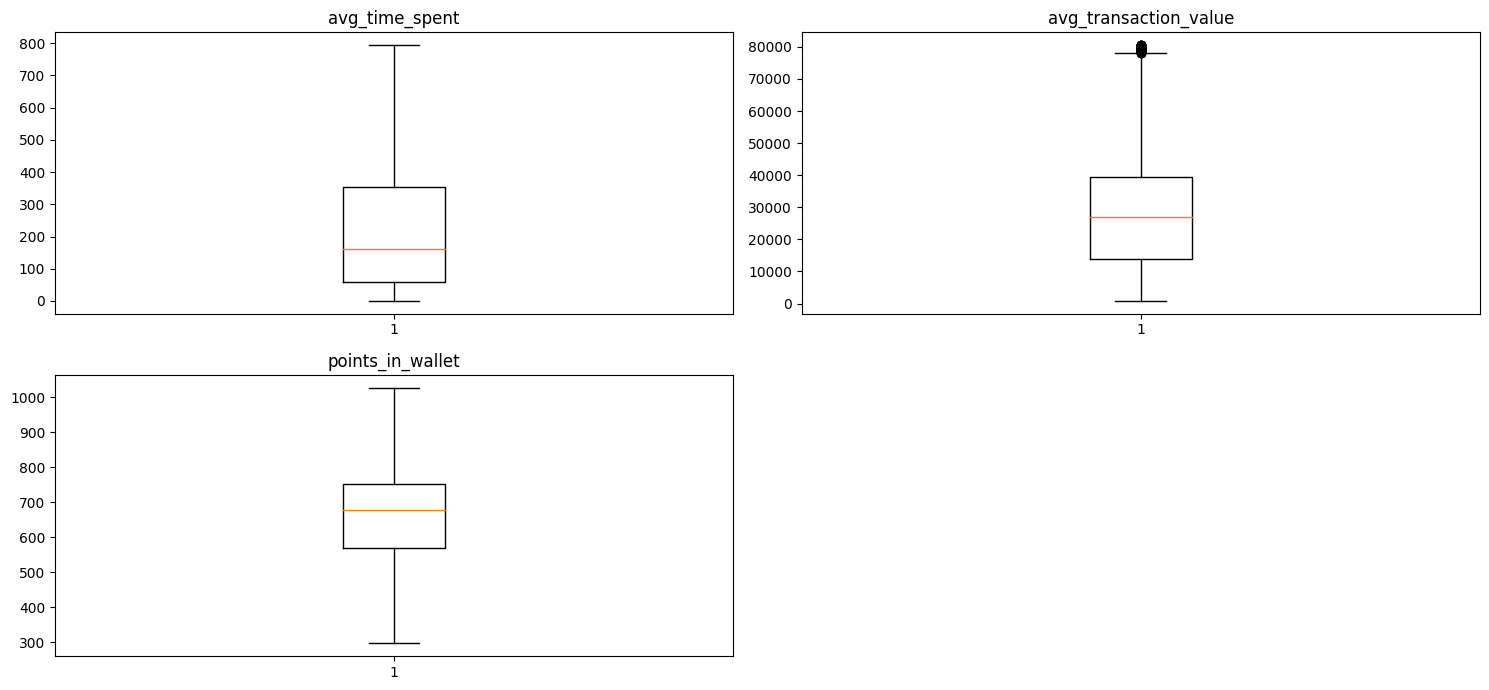

In [24]:
plt.figure(figsize=(15,7))

for i, col in enumerate(cols):
    plt.subplot(2,2, i + 1)
    plt.boxplot(data_train[col])
    plt.title(col)

plt.tight_layout()
plt.show()

Berikut adalah sebaran data setelah dilakukan handling terhadap outlier.

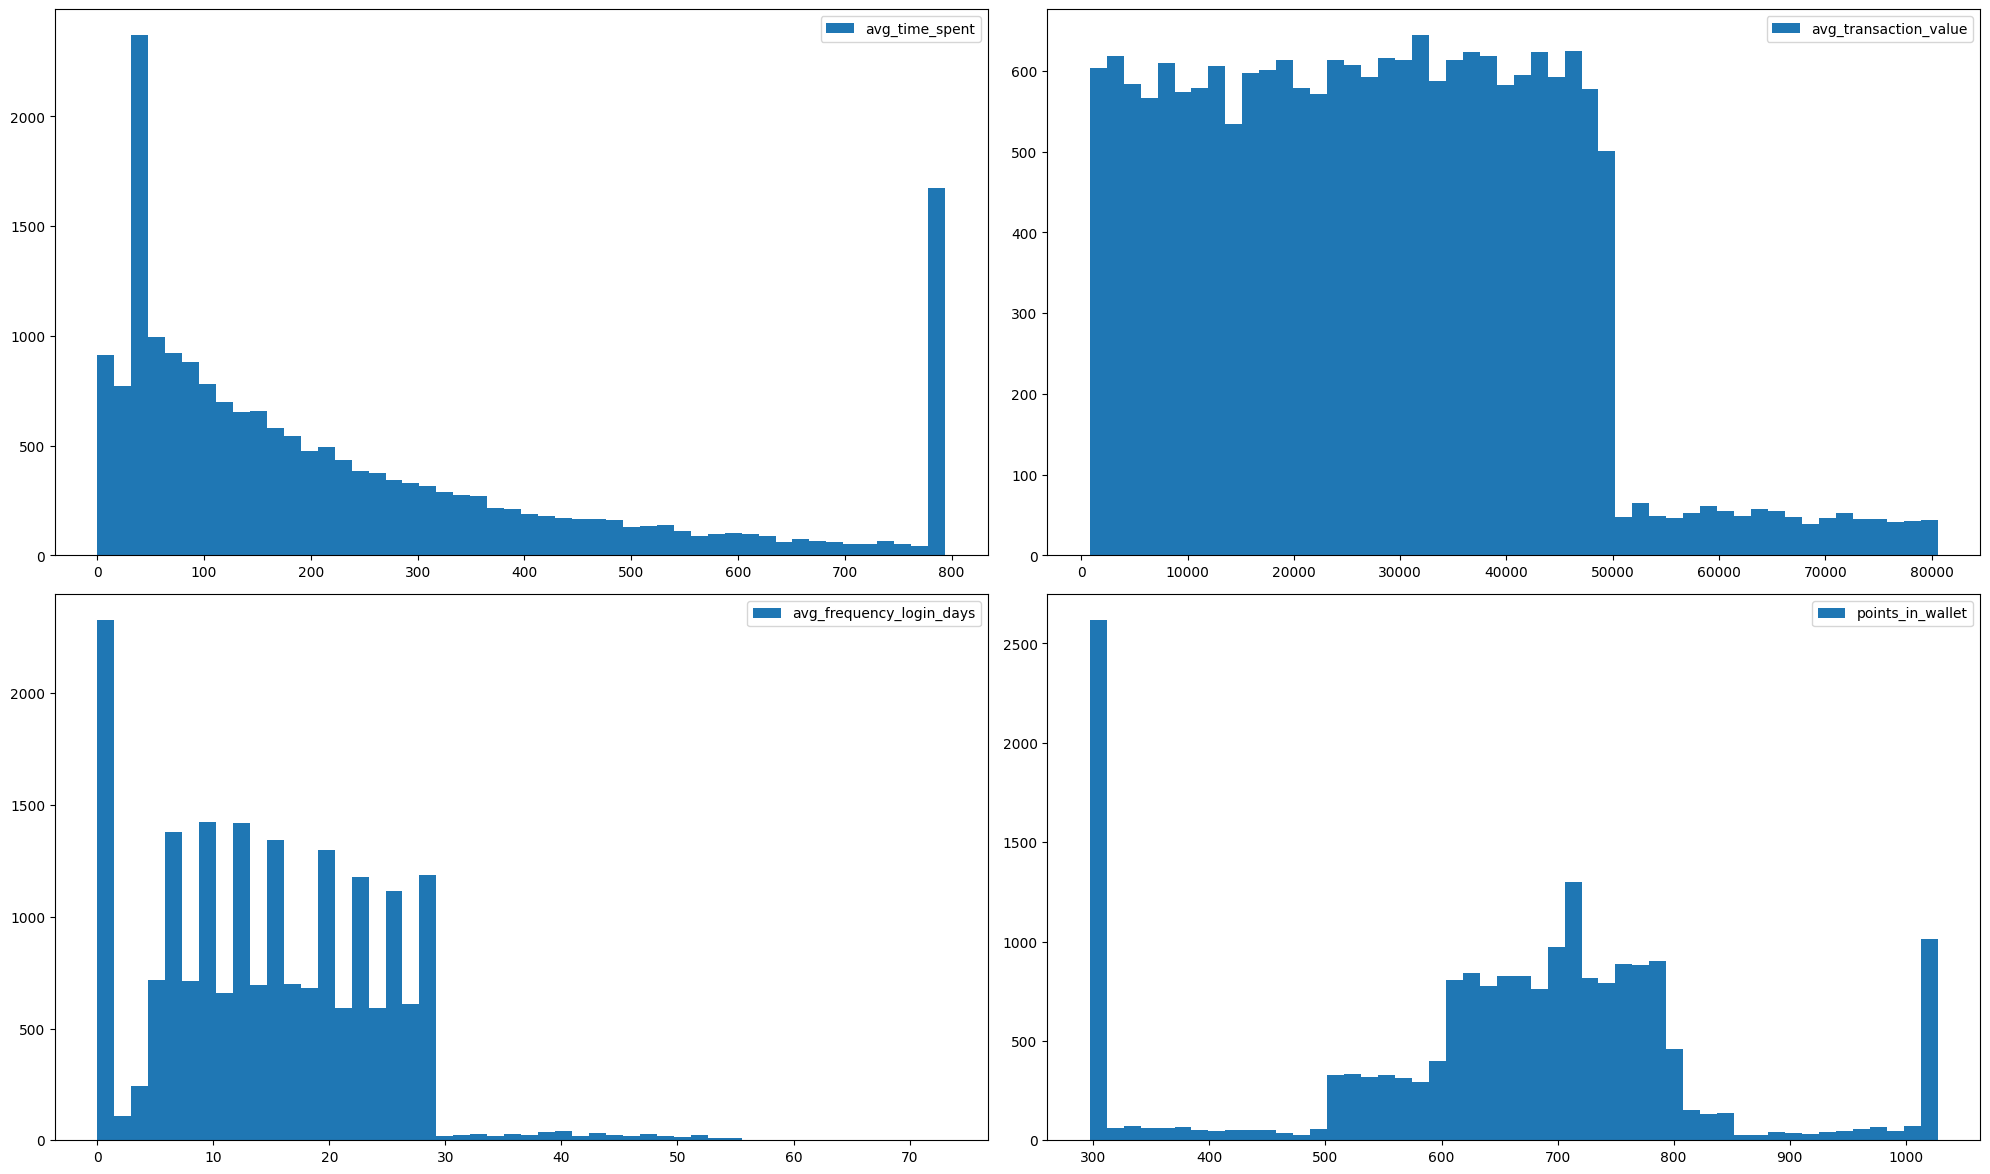

In [25]:
plt.figure(figsize=(20,35))
# Loop through each column in the DataFrame
for i, column in enumerate(df.columns):
    # Check if the column is numerical
    if data_train[column].dtype in [np.number]:
        plt.subplot(6,2, i + 2)
        plt.hist(data_train[column], bins=50, label=column)
        plt.legend()

plt.tight_layout()
plt.show()

Data kemudian di split lagi menjadi X dan y untuk pemisahan feature dan target.

In [26]:
X_train = data_train.drop('churn_risk_score', axis=1)
y_train = data_train['churn_risk_score']
X_test = data_test.drop('churn_risk_score', axis=1)
y_test = data_test['churn_risk_score']
X_val = data_val.drop('churn_risk_score', axis=1)
y_val = data_val['churn_risk_score']

Berikutnya akan dilakukan scale terhadap numerical column dan encode terhadap categorical column.

In [27]:
num_cols = ['avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet']
cat_cols_ohe = ['joined_through_referral', 'preferred_offer_types', 
               'offer_application_preference', 'feedback']
cat_cols_ord = ['membership_category']

In [28]:
membership_category = ['No Membership', 'Basic Membership', 'Silver Membership', 'Gold Membership', 'Platinum Membership', 'Premium Membership']

In [29]:
scaler = MinMaxScaler()
ohe = OneHotEncoder()
ord = OrdinalEncoder(categories=[membership_category])

In [30]:
preprocessor = ColumnTransformer(
    transformers=[
        ("scale", scaler, num_cols),
        ("ohe", ohe, cat_cols_ohe),
        ("ord", ord, cat_cols_ord)
        ])

preprocessor

ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                 ['avg_time_spent', 'avg_transaction_value',
                                  'avg_frequency_login_days',
                                  'points_in_wallet']),
                                ('ohe', OneHotEncoder(),
                                 ['joined_through_referral',
                                  'preferred_offer_types',
                                  'offer_application_preference', 'feedback']),
                                ('ord',
                                 OrdinalEncoder(categories=[['No Membership',
                                                             'Basic Membership',
                                                             'Silver '
                                                             'Membership',
                                                             'Gold Membership',
                                                             'Platinum '
                                                             'Membership',
                                                             'Premium '
                                                             'Membership']]),
                                 ['membership_category'])])

In [31]:
X_train_final = preprocessor.fit_transform(X_train)
X_test_final = preprocessor.transform(X_test)
X_val_final = preprocessor.transform(X_val)

In [32]:
tf.random.set_seed(1496)
train_pipe = tf.data.Dataset.from_tensor_slices((X_train_final,y_train)).shuffle(1000).batch(128)
test_pipe = tf.data.Dataset.from_tensor_slices((X_test_final,y_test)).batch(128)
val_pipe = tf.data.Dataset.from_tensor_slices((X_val_final,y_val)).batch(128)

# Model Definition

Model yang akan digunakan adalah ANN Sequential dan Functional. Berikut adalah model baseline dari kedua model tersebut. Akan dilakukan percobaan terlebih dahulu baru kemudian berikutnya akan dilakukan model tuning untuk menghasilkan performa model yang lebih baik.

In [33]:
alp = 8
inp = X_train_final.shape[1]
out = 1
hid = int(len(X_train_final)/(alp*(inp+out)))
print(f'Jumlah neuron pada hidden layer: {hid}')

model_seq = tf.keras.models.Sequential([
    tf.keras.layers.Dense(inp, activation='relu', input_shape=(inp,)),
    tf.keras.layers.Dense(hid, activation='relu'),
    tf.keras.layers.Dense(out, activation='sigmoid')
])

model_seq.summary()

Jumlah neuron pada hidden layer: 110
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 21)                462       
                                                                 
 dense_1 (Dense)             (None, 110)               2420      
                                                                 
 dense_2 (Dense)             (None, 1)                 111       
                                                                 
Total params: 2,993
Trainable params: 2,993
Non-trainable params: 0
_________________________________________________________________


In [34]:
input_lyr = tf.keras.layers.Input(shape=(X_train_final.shape[1],))
layers = tf.keras.layers.Dense(inp, activation='relu')(input_lyr)
layers = tf.keras.layers.Dense(hid,activation='relu')(layers)
output = tf.keras.layers.Dense(out, activation='sigmoid')(layers)

model_func = tf.keras.models.Model(inputs=input_lyr,outputs=output)

model_func.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 21)]              0         
                                                                 
 dense_3 (Dense)             (None, 21)                462       
                                                                 
 dense_4 (Dense)             (None, 110)               2420      
                                                                 
 dense_5 (Dense)             (None, 1)                 111       
                                                                 
Total params: 2,993
Trainable params: 2,993
Non-trainable params: 0
_________________________________________________________________


In [35]:
model_seq.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics='accuracy')
model_func.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics='accuracy')

# Model Training

Berikutnya akan dilakukan training terhadap Model Sequential dan Functional.

In [54]:
history_seq = model_seq.fit(train_pipe, epochs=50, validation_data=val_pipe)

Epoch 1/50
152/152 [==============================] - 1s 5ms/step - loss: 0.1666 - accuracy: 0.9282 - val_loss: 0.1664 - val_accuracy: 0.9348
Epoch 2/50
152/152 [==============================] - 1s 5ms/step - loss: 0.1702 - accuracy: 0.9267 - val_loss: 0.1703 - val_accuracy: 0.9312
Epoch 3/50
152/152 [==============================] - 1s 5ms/step - loss: 0.1700 - accuracy: 0.9287 - val_loss: 0.1654 - val_accuracy: 0.9340
Epoch 4/50
152/152 [==============================] - 1s 5ms/step - loss: 0.1679 - accuracy: 0.9261 - val_loss: 0.1741 - val_accuracy: 0.9340
Epoch 5/50
152/152 [==============================] - 1s 4ms/step - loss: 0.1696 - accuracy: 0.9277 - val_loss: 0.1674 - val_accuracy: 0.9330
Epoch 6/50
152/152 [==============================] - 1s 4ms/step - loss: 0.1673 - accuracy: 0.9270 - val_loss: 0.1703 - val_accuracy: 0.9336
Epoch 7/50
152/152 [==============================] - 1s 4ms/step - loss: 0.1700 - accuracy: 0.9260 - val_loss: 0.1770 - val_accuracy: 0.9334
Epoch 

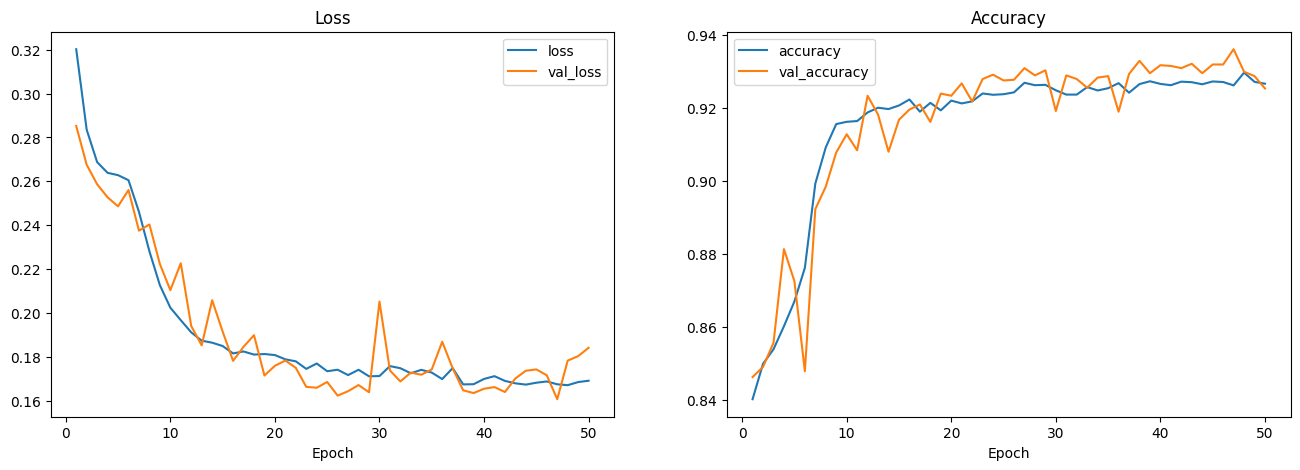

In [37]:
epoch=50

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),history_seq.history['loss'],label='loss')
ax[0].plot(range(1,epoch+1),history_seq.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')

ax[1].plot(range(1,epoch+1),history_seq.history['accuracy'],label='accuracy')
ax[1].plot(range(1,epoch+1),history_seq.history['val_accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')

plt.show()

Model Sequential Baseline ini masih memiliki performa yang kurang stabil. Dapat terlihat pada plot diatas akurasi pada train dan validation belum menemukan hasil yang convergent.

In [38]:
history_func = model_func.fit(train_pipe, epochs=50, validation_data=val_pipe)

Epoch 1/50
152/152 [==============================] - 1s 4ms/step - loss: 0.3174 - accuracy: 0.8414 - val_loss: 0.3025 - val_accuracy: 0.8454
Epoch 2/50
152/152 [==============================] - 1s 4ms/step - loss: 0.2876 - accuracy: 0.8477 - val_loss: 0.2613 - val_accuracy: 0.8508
Epoch 3/50
152/152 [==============================] - 1s 4ms/step - loss: 0.2655 - accuracy: 0.8607 - val_loss: 0.2539 - val_accuracy: 0.8587
Epoch 4/50
152/152 [==============================] - 1s 4ms/step - loss: 0.2583 - accuracy: 0.8795 - val_loss: 0.2398 - val_accuracy: 0.9028
Epoch 5/50
152/152 [==============================] - 1s 4ms/step - loss: 0.2417 - accuracy: 0.9055 - val_loss: 0.2212 - val_accuracy: 0.9224
Epoch 6/50
152/152 [==============================] - 1s 4ms/step - loss: 0.2189 - accuracy: 0.9137 - val_loss: 0.2125 - val_accuracy: 0.9184
Epoch 7/50
152/152 [==============================] - 1s 4ms/step - loss: 0.2079 - accuracy: 0.9141 - val_loss: 0.1976 - val_accuracy: 0.9256
Epoch 

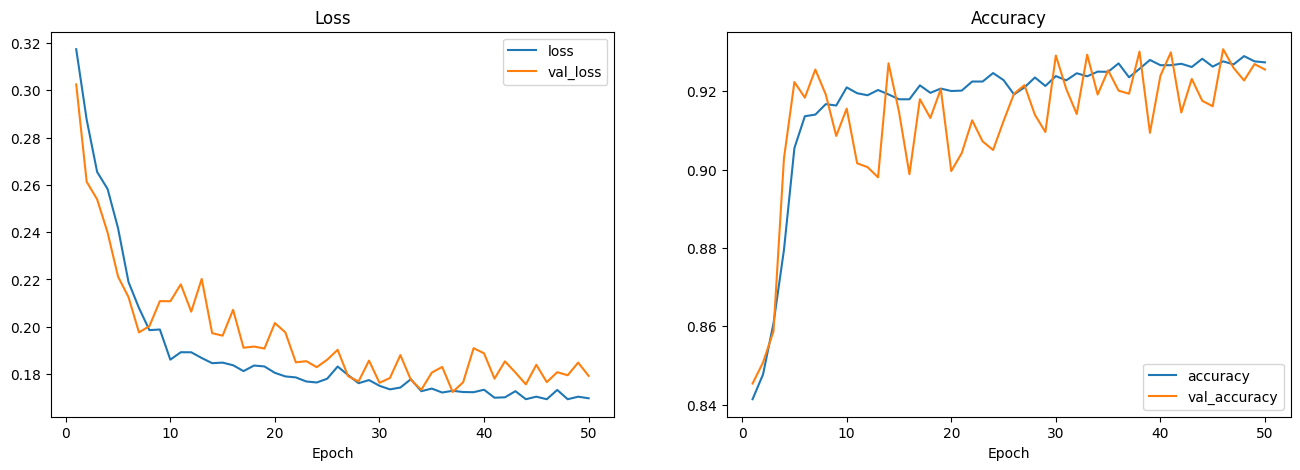

In [39]:
epoch=50

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),history_func.history['loss'],label='loss')
ax[0].plot(range(1,epoch+1),history_func.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')

ax[1].plot(range(1,epoch+1),history_func.history['accuracy'],label='accuracy')
ax[1].plot(range(1,epoch+1),history_func.history['val_accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')

plt.show()

Pada Model Functional diatas, dapat terlihat pada plot terdapat ketidak stabilan yang cukup tinggi. Selanjutnya kedua model ini akan ditingkatkan performanya di Model Improvement.

## Model Improvement

Dilakukan beberapa percobaan untuk meningkatkan performa pada kedua model. Khususnya pada jumlah hidden layer, jumlah neuron, dropout dan BatchNormalization.

In [40]:
top_model_seq = tf.keras.models.Sequential([
    tf.keras.layers.Dense(inp, activation='relu', input_shape=(inp,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(hid, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(hid/2, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(hid/4, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(out, activation='sigmoid')
])

top_model_seq.summary()

top_model_seq.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(),metrics='accuracy')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 21)                462       
                                                                 
 batch_normalization (BatchN  (None, 21)               84        
 ormalization)                                                   
                                                                 
 dense_7 (Dense)             (None, 110)               2420      
                                                                 
 batch_normalization_1 (Batc  (None, 110)              440       
 hNormalization)                                                 
                                                                 
 dense_8 (Dense)             (None, 55)                6105      
                                                                 
 batch_normalization_2 (Batc  (None, 55)              

In [41]:
early_stop = EarlyStopping(monitor='val_loss', patience=5)

history_top_seq = top_model_seq.fit(train_pipe, epochs=30, validation_data=val_pipe)

# history_top_seq = top_model_seq.fit(train_pipe, epochs=30, validation_data=val_pipe, callbacks=[early_stop])

Epoch 1/30
152/152 [==============================] - 2s 9ms/step - loss: 0.3662 - accuracy: 0.8187 - val_loss: 0.4119 - val_accuracy: 0.8464
Epoch 2/30
152/152 [==============================] - 1s 8ms/step - loss: 0.2982 - accuracy: 0.8480 - val_loss: 0.2894 - val_accuracy: 0.8526
Epoch 3/30
152/152 [==============================] - 1s 9ms/step - loss: 0.2841 - accuracy: 0.8518 - val_loss: 0.2715 - val_accuracy: 0.8569
Epoch 4/30
152/152 [==============================] - 1s 10ms/step - loss: 0.2758 - accuracy: 0.8573 - val_loss: 0.2726 - val_accuracy: 0.8528
Epoch 5/30
152/152 [==============================] - 1s 10ms/step - loss: 0.2723 - accuracy: 0.8603 - val_loss: 0.2624 - val_accuracy: 0.8637
Epoch 6/30
152/152 [==============================] - 1s 10ms/step - loss: 0.2701 - accuracy: 0.8595 - val_loss: 0.2609 - val_accuracy: 0.8677
Epoch 7/30
152/152 [==============================] - 2s 10ms/step - loss: 0.2664 - accuracy: 0.8623 - val_loss: 0.2625 - val_accuracy: 0.8629
Ep

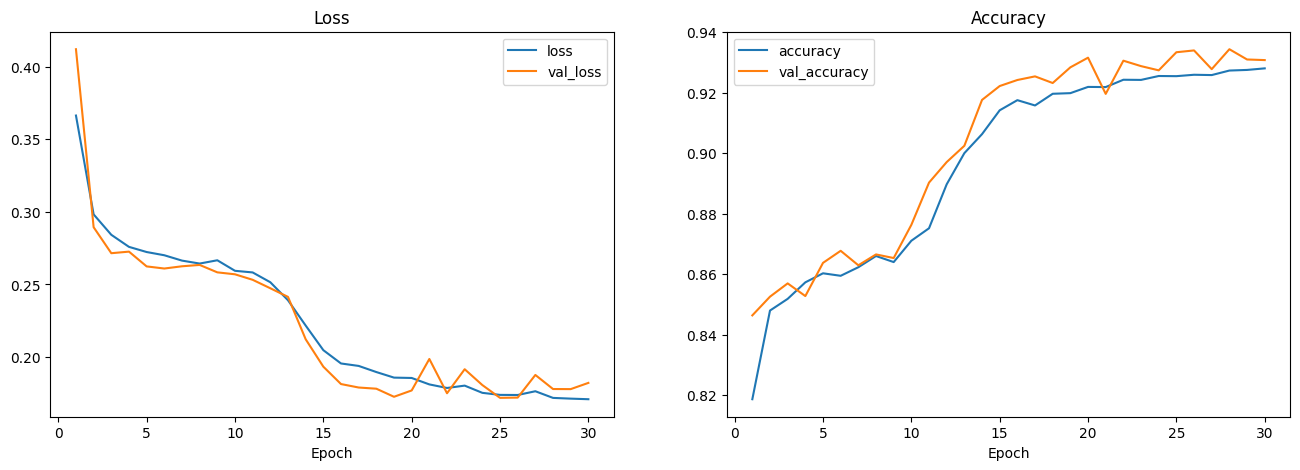

In [42]:
epoch=30

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),history_top_seq.history['loss'],label='loss')
ax[0].plot(range(1,epoch+1),history_top_seq.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')
# ax[0].set_ylim(0,0.01)

ax[1].plot(range(1,epoch+1),history_top_seq.history['accuracy'],label='accuracy')
ax[1].plot(range(1,epoch+1),history_top_seq.history['val_accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')
# ax[1].set_ylim(0.5,1.5)

plt.show()

Dapat dilihat berdasarkan visualisasi diatas, terdapat peningkatan performa model yang cukup baik dibandingkan sebelumnya pada Model Sequential.

In [43]:
input_lyr = tf.keras.layers.Input(shape=(X_train_final.shape[1],))
layers = tf.keras.layers.Dense(inp, activation='relu')(input_lyr)
layers = tf.keras.layers.BatchNormalization()(layers)
layers = tf.keras.layers.Dense(hid,activation='relu')(layers)
layers = tf.keras.layers.BatchNormalization()(layers)
layers = tf.keras.layers.Dense(hid/2,activation='relu')(layers)
layers = tf.keras.layers.BatchNormalization()(layers)
# layers = tf.keras.layers.Dense(hid/4,activation='relu')(layers)
# layers = tf.keras.layers.BatchNormalization()(layers)
# layers = tf.keras.layers.Dropout(0.2)(layers)
output = tf.keras.layers.Dense(out, activation='sigmoid')(layers)

top_model_func = tf.keras.models.Model(inputs=input_lyr,outputs=output)

top_model_func.summary()

top_model_func.compile(loss='binary_crossentropy',optimizer=tf.keras.optimizers.Adam(),metrics='accuracy')

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 21)]              0         
                                                                 
 dense_11 (Dense)            (None, 21)                462       
                                                                 
 batch_normalization_4 (Batc  (None, 21)               84        
 hNormalization)                                                 
                                                                 
 dense_12 (Dense)            (None, 110)               2420      
                                                                 
 batch_normalization_5 (Batc  (None, 110)              440       
 hNormalization)                                                 
                                                                 
 dense_13 (Dense)            (None, 55)                6105

In [44]:
history_top_func = top_model_func.fit(train_pipe, epochs=30, validation_data=val_pipe)

Epoch 1/30
152/152 [==============================] - 2s 9ms/step - loss: 0.3428 - accuracy: 0.8335 - val_loss: 0.3893 - val_accuracy: 0.8464
Epoch 2/30
152/152 [==============================] - 1s 9ms/step - loss: 0.2995 - accuracy: 0.8485 - val_loss: 0.2958 - val_accuracy: 0.8494
Epoch 3/30
152/152 [==============================] - 1s 9ms/step - loss: 0.2882 - accuracy: 0.8537 - val_loss: 0.2732 - val_accuracy: 0.8585
Epoch 4/30
152/152 [==============================] - 1s 8ms/step - loss: 0.2799 - accuracy: 0.8604 - val_loss: 0.2664 - val_accuracy: 0.8629
Epoch 5/30
152/152 [==============================] - 1s 8ms/step - loss: 0.2752 - accuracy: 0.8609 - val_loss: 0.2638 - val_accuracy: 0.8659
Epoch 6/30
152/152 [==============================] - 1s 8ms/step - loss: 0.2716 - accuracy: 0.8631 - val_loss: 0.2611 - val_accuracy: 0.8653
Epoch 7/30
152/152 [==============================] - 1s 8ms/step - loss: 0.2665 - accuracy: 0.8671 - val_loss: 0.2559 - val_accuracy: 0.8737
Epoch 

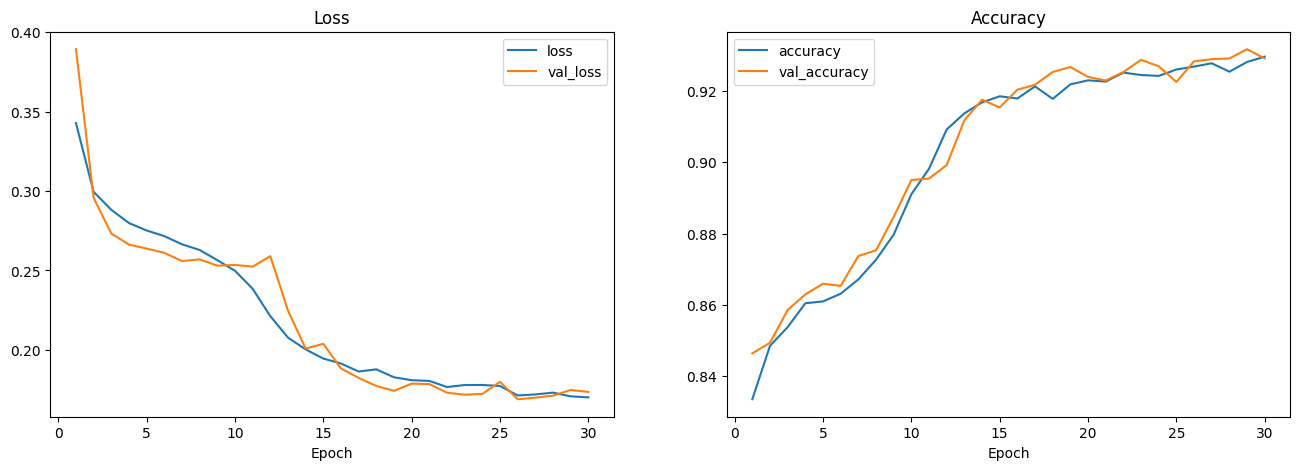

In [45]:
epoch=30

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),history_top_func.history['loss'],label='loss')
ax[0].plot(range(1,epoch+1),history_top_func.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')
# ax[0].set_ylim(0,0.01)

ax[1].plot(range(1,epoch+1),history_top_func.history['accuracy'],label='accuracy')
ax[1].plot(range(1,epoch+1),history_top_func.history['val_accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')
# ax[1].set_ylim(0.5,1.5)

plt.show()

Pada Model Functional, berdasarkan visualisasi diatas terdapat peningkatan model yang sangat baik dibandingkan sebelumnnya. Dimana accuracy pada train dan pada validation cukup convergent.

# Model Evaluation

In [47]:
y_prob_seq = model_seq.predict(X_test_final)
y_pred_seq = np.round(y_prob_seq)

y_prob_seq_top = top_model_seq.predict(X_test_final)
y_pred_seq_top = np.round(y_prob_seq_top)

y_prob_func = model_func.predict(X_test_final)
y_pred_func = np.round(y_prob_func)

y_prob_func_top = top_model_func.predict(X_test_final)
y_pred_func_top = np.round(y_prob_func_top)

196/196 [==============================] - 1s 3ms/step


In [51]:
print('='*20, 'Sequential Baseline Model Test', '='*20)
print(classification_report(y_test,y_pred_seq))
print('AUC:',roc_auc_score(y_test,y_prob_seq))
print('='*20, 'Sequential Best Model Test', '='*20)
print(classification_report(y_test,y_pred_seq_top))
print('AUC:',roc_auc_score(y_test,y_prob_seq_top))
print('='*20, 'Functional Baseline Model Test', '='*20)
print(classification_report(y_test,y_pred_func))
print('AUC:',roc_auc_score(y_test,y_prob_func))
print('='*20, 'Functional Best Model Test', '='*20)
print(classification_report(y_test,y_pred_func_top))
print('AUC:',roc_auc_score(y_test,y_prob_func_top))
print('\n')

==================== Sequential Baseline Model Test ====================
              precision    recall  f1-score   support

           0       0.99      0.84      0.91      2885
           1       0.88      0.99      0.93      3380

    accuracy                           0.92      6265
   macro avg       0.93      0.91      0.92      6265
weighted avg       0.93      0.92      0.92      6265

AUC: 0.9751185995713392
==================== Sequential Best Model Test ====================
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      2885
           1       0.93      0.94      0.93      3380

    accuracy                           0.93      6265
   macro avg       0.93      0.93      0.93      6265
weighted avg       0.93      0.93      0.93      6265

AUC: 0.9729644252561196
==================== Functional Baseline Model Test ====================
              precision    recall  f1-score   support

           0       0.93     

In [52]:
seq_eval = model_seq.evaluate(test_pipe)
seq_top_eval = top_model_seq.evaluate(test_pipe)
func_eval = model_func.evaluate(test_pipe)
func_top_eval = top_model_func.evaluate(test_pipe)

print(f'model seq (loss : {seq_eval[0]} |', f'accuracy : {seq_eval[1]})')
print(f'model seq tunning (loss : {seq_top_eval[0]} |', f'accuracy : {seq_top_eval[1]})')
print(f'model func (loss : {func_eval[0]} |', f'accuracy : {func_eval[1]})')
print(f'model func tunning (loss : {func_top_eval[0]} |', f'accuracy : {func_top_eval[1]})')

49/49 [==============================] - 0s 5ms/step - loss: 0.1822 - accuracy: 0.9280
model seq (loss : 0.1938372105360031 | accuracy : 0.9198722839355469)
model seq tunning (loss : 0.1840294599533081 | accuracy : 0.9278531670570374)
model func (loss : 0.19849893450737 | accuracy : 0.916520357131958)
model func tunning (loss : 0.1822396218776703 | accuracy : 0.9280127882957458)


Berdasarkan hasil prediksi, Model Functional yang sudah dituning menunjukkan hasil paling baik dan paling konsisten. Berdasarkan score AUC, yang tertinggi adalah Sequential Baseline Model, namun kurang ada konsistensi pada precision dan recall masing-masing kelas. Pada Hasil Evaluate juga ditemukan bahwa akurasi terbaik ada pada Functional Best Model. Sehingga berdasarkan hasil konsistensi dan score secara overall, yang terbaik adalah Functional Best Model.

# Model Inference

Berikutnya akan dilakukan model inference di notebook alternatif, fungsi-fungsi dibawah ini hanya untuk membantu pembuatan inference.

In [58]:
df.head(5)

,membership_category,joined_through_referral,preferred_offer_types,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,offer_application_preference,feedback,churn_risk_score
0,No Membership,Yes,Without Offers,1184.490000,38604.69,10.0,627.48,Yes,Poor Website,1
1,Basic Membership,Yes,Without Offers,338.150000,7665.66,17.0,575.97,No,Poor Customer Service,1
3,No Membership,No,Credit/Debit Card Offers,56.670000,15678.14,11.0,590.22,Yes,Too many ads,1
5,Premium Membership,No,Credit/Debit Card Offers,1397.318999,29664.01,28.0,782.49,Yes,Poor Product Quality,0
6,Gold Membership,Yes,Gift Vouchers/Coupons,416.300000,13160.39,24.0,712.94,No,No reason specified,1


In [59]:
df.columns

Index(['membership_category', 'joined_through_referral',
       'preferred_offer_types', 'avg_time_spent', 'avg_transaction_value',
       'avg_frequency_login_days', 'points_in_wallet',
       'offer_application_preference', 'feedback', 'churn_risk_score'],
      dtype='object')

## Model Saving

In [56]:
with open('preprocessor.pkl', 'wb') as file_1:
  joblib.dump(preprocessor, file_1)
  
top_model_func.save('model.h5')

# Overall Analysis

- Target yang digunakan dalam model adalah churn_risk_score. Feature yang digunakan adalah 9 kolum dengan tingkat korelasi tertinggi terhadap target
- Pada target, kelas 0 dan 1 memiliki jumlah yang cukup balanced.
- Model yang dibuat pada notebook adalah ANN Sequential dan Functional
- Pada percobaan Model Baseline, ditemukan ketidak-konsistenan model pada train dan validation
- Dilakukan tuning pada kedua Model, khususnya pada penambahan hidden layer, pengaturan jumlah neuron, dropout, dan batchnormalization.
- Berdasarkan beberapa percobaan, Model terbaik disini adalah Model Functional yang telah di tuning.

    - Berdasarkan hasil prediksi, Model Functional yang sudah dituning menunjukkan hasil paling baik dan paling konsisten. 
    - Berdasarkan score AUC, yang tertinggi adalah Sequential Baseline Model, namun kurang ada konsistensi pada precision dan recall masing-masing kelas. 
    - Pada Hasil Evaluate juga ditemukan bahwa akurasi terbaik ada pada Functional Best Model. 
    - Sehingga berdasarkan hasil konsistensi dan score secara overall, yang terbaik adalah Functional Best Model.